#📌 Extracão

In [ ]:
import pandas as pd

In [42]:
df = pd.read_csv('telecom_churn_clean.csv')

display(df.head())

print(df.info())
print(df.shape)

,customerID,Churn,Churn_numeric,customer.tenure,account.Charges.Monthly,Contas_Diarias,account.Contract,account.PaymentMethod,internet.InternetService,customer.Partner,customer.Dependents
0,0002-ORFBO,No,0,9,65.6,2.186667,One year,Mailed check,DSL,Yes,Yes
1,0003-MKNFE,No,0,9,59.9,1.996667,Month-to-month,Mailed check,DSL,No,No
2,0004-TLHLJ,Yes,1,4,73.9,2.463333,Month-to-month,Electronic check,Fiber optic,No,No
3,0011-IGKFF,Yes,1,13,98.0,3.266667,Month-to-month,Electronic check,Fiber optic,Yes,No
4,0013-EXCHZ,Yes,1,3,83.9,2.796667,Month-to-month,Mailed check,Fiber optic,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7043 non-null   object 
 2   Churn_numeric             7267 non-null   int64  
 3   customer.tenure           7267 non-null   int64  
 4   account.Charges.Monthly   7267 non-null   float64
 5   Contas_Diarias            7267 non-null   float64
 6   account.Contract          7267 non-null   object 
 7   account.PaymentMethod     7267 non-null   object 
 8   internet.InternetService  7267 non-null   object 
 9   customer.Partner          7267 non-null   object 
 10  customer.Dependents       7267 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.6+ KB
None
(7267, 11)


#🔧 Preparação dos Dados

In [ ]:
# Remoção de Colunas Irrelevantes
df = df.drop('customerID', axis=1)

display(df.head())
print(df.info())

,Churn,Churn_numeric,customer.tenure,account.Charges.Monthly,Contas_Diarias,account.Contract,account.PaymentMethod,internet.InternetService,customer.Partner,customer.Dependents
0,No,0,9,65.6,2.186667,One year,Mailed check,DSL,Yes,Yes
1,No,0,9,59.9,1.996667,Month-to-month,Mailed check,DSL,No,No
2,Yes,1,4,73.9,2.463333,Month-to-month,Electronic check,Fiber optic,No,No
3,Yes,1,13,98.0,3.266667,Month-to-month,Electronic check,Fiber optic,Yes,No
4,Yes,1,3,83.9,2.796667,Month-to-month,Mailed check,Fiber optic,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   Churn_numeric             7267 non-null   int64  
 2   customer.tenure           7267 non-null   int64  
 3   account.Charges.Monthly   7267 non-null   float64
 4   Contas_Diarias            7267 non-null   float64
 5   account.Contract          7267 non-null   object 
 6   account.PaymentMethod     7267 non-null   object 
 7   internet.InternetService  7267 non-null   object 
 8   customer.Partner          7267 non-null   object 
 9   customer.Dependents       7267 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 567.9+ KB
None


In [ ]:
#Aplicação de One Hot Encoding para Transformar Variáveis categoricas em numéricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())
print(df.info())

,Churn,Churn_numeric,customer.tenure,account.Charges.Monthly,Contas_Diarias,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,internet.InternetService_Fiber optic,internet.InternetService_No,customer.Partner_Yes,customer.Dependents_Yes
0,No,0,9,65.6,2.186667,True,False,False,False,True,False,False,True,True
1,No,0,9,59.9,1.996667,False,False,False,False,True,False,False,False,False
2,Yes,1,4,73.9,2.463333,False,False,False,True,False,True,False,False,False
3,Yes,1,13,98.0,3.266667,False,False,False,True,False,True,False,True,False
4,Yes,1,3,83.9,2.796667,False,False,False,False,True,True,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   object 
 1   Churn_numeric                                  7267 non-null   int64  
 2   customer.tenure                                7267 non-null   int64  
 3   account.Charges.Monthly                        7267 non-null   float64
 4   Contas_Diarias                                 7267 non-null   float64
 5   account.Contract_One year                      7267 non-null   bool   
 6   account.Contract_Two year                      7267 non-null   bool   
 7   account.PaymentMethod_Credit card (automatic)  7267 non-null   bool   
 8   account.PaymentMethod_Electronic check         7267 non-null   bool   
 9   account.PaymentMethod_Mailed check             7267 

In [ ]:
#Verificação de Proporção de Evasão
contagem_churn = df['Churn'].value_counts()

proporcoes_churn = df['Churn'].value_counts(normalize=True)

print("Contagem de clientes por status de evasão:")
print(contagem_churn)

print("\nProporção de clientes por status de evasão:")
print(proporcoes_churn)

print("\nAvaliação de Desequilíbrio de Classes:")
if proporcoes_churn.min() < 0.25:
    print("Há um desequilíbrio significativo nas classes.")
else:
    print("As classes estão relativamente equilibradas.")

Contagem de clientes por status de evasão:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporção de clientes por status de evasão:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Avaliação de Desequilíbrio de Classes:
As classes estão relativamente equilibradas.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Aplicação de Técnicas de Normalização
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Primeiras 5 linhas do DataFrame após padronização:")
display(df.head())

print("\nNomes das colunas e seus tipos de dados após padronização:")
print(df.info())

Primeiras 5 linhas do DataFrame após padronização:


,Churn,Churn_numeric,customer.tenure,account.Charges.Monthly,Contas_Diarias,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,internet.InternetService_Fiber optic,internet.InternetService_No,customer.Partner_Yes,customer.Dependents_Yes
0,No,-0.588421,-0.950200,0.029206,0.029206,True,False,False,False,True,False,False,True,True
1,No,-0.588421,-0.950200,-0.159990,-0.159990,False,False,False,False,True,False,False,False,False
2,Yes,1.699463,-1.153700,0.304702,0.304702,False,False,False,True,False,True,False,False,False
3,Yes,1.699463,-0.787401,1.104635,1.104635,False,False,False,True,False,True,False,True,False
4,Yes,1.699463,-1.194400,0.636624,0.636624,False,False,False,False,True,True,False,True,False



Nomes das colunas e seus tipos de dados após padronização:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   object 
 1   Churn_numeric                                  7267 non-null   float64
 2   customer.tenure                                7267 non-null   float64
 3   account.Charges.Monthly                        7267 non-null   float64
 4   Contas_Diarias                                 7267 non-null   float64
 5   account.Contract_One year                      7267 non-null   bool   
 6   account.Contract_Two year                      7267 non-null   bool   
 7   account.PaymentMethod_Credit card (automatic)  7267 non-null   bool   
 8   account.PaymentMethod_Electronic check         7267 non-null   bool 

#📊 Correlação e Seleção de Variáveis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

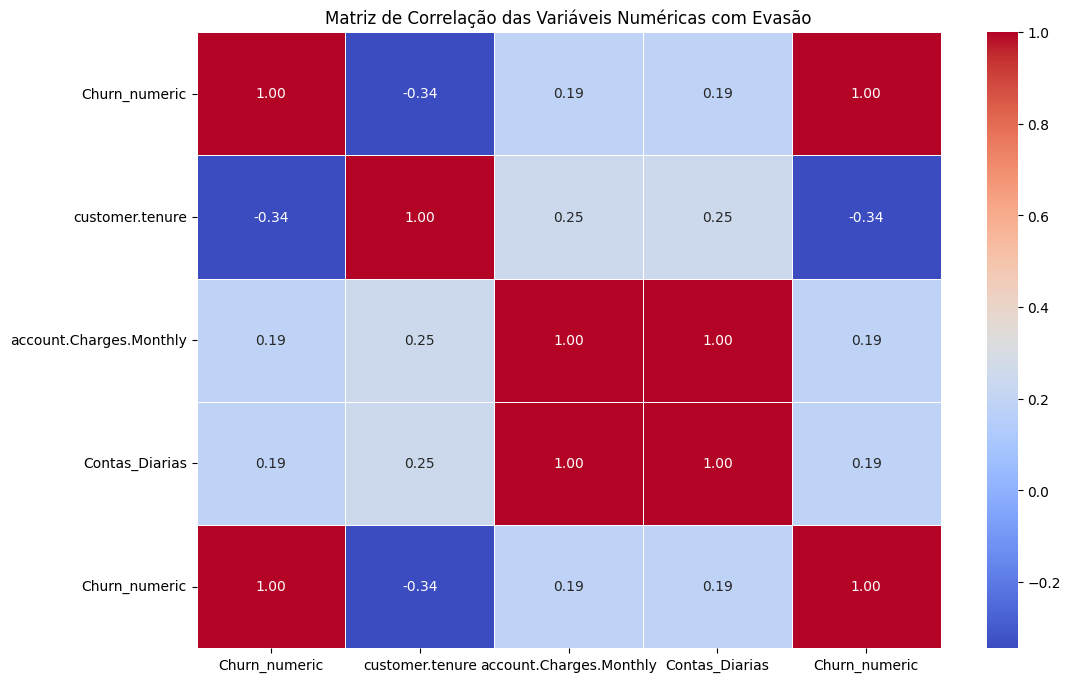

In [ ]:
# Matriz de correlação para as variáveis numéricas
correlation_matrix = df[numerical_cols + ['Churn_numeric']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas com Evasão')
plt.show()

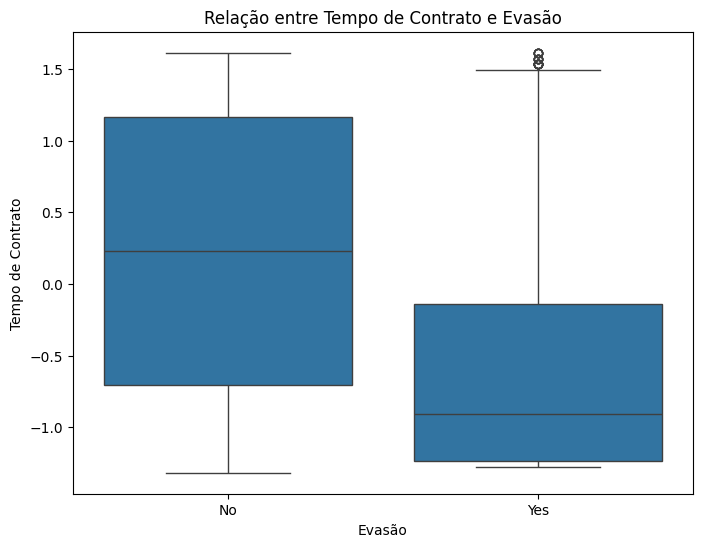

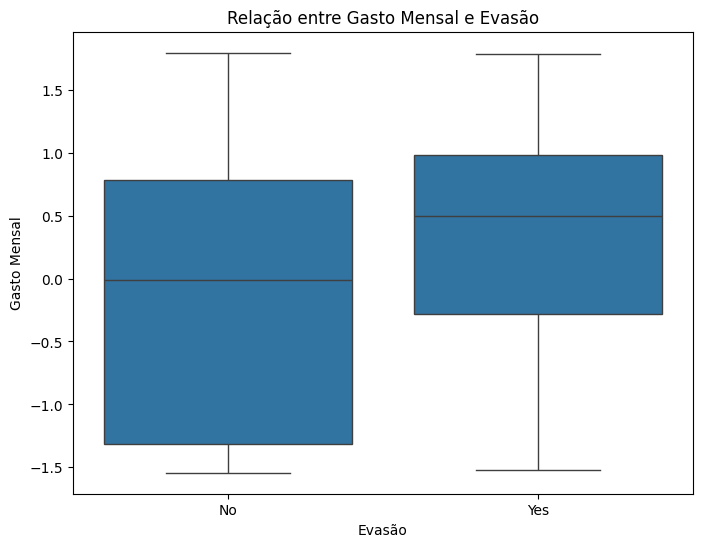

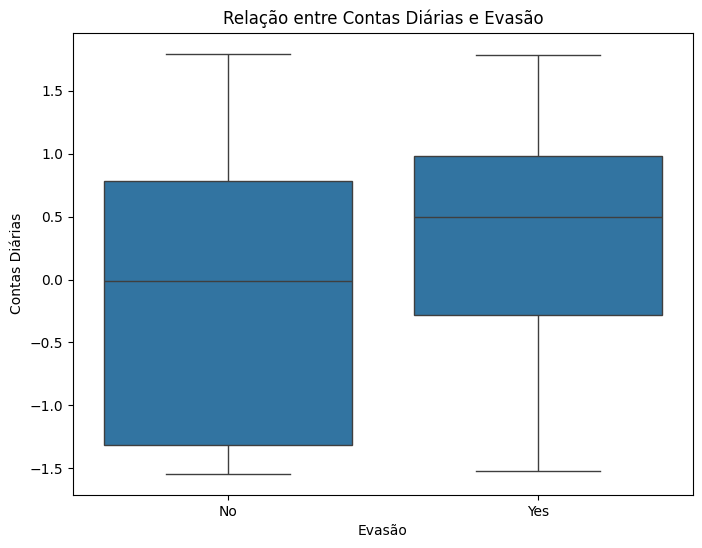

In [ ]:
# Relação entre 'customer.tenure' e 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Relação entre Tempo de Contrato e Evasão')
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato')
plt.show()

# Relação entre 'account.Charges.Monthly' e 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df)
plt.title('Relação entre Gasto Mensal e Evasão')
plt.xlabel('Evasão')
plt.ylabel('Gasto Mensal')
plt.show()

# Relação entre 'Contas_Diarias' e 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Contas_Diarias', data=df)
plt.title('Relação entre Contas Diárias e Evasão')
plt.xlabel('Evasão')
plt.ylabel('Contas Diárias')
plt.show()

#📄Modelagem Preditiva

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop(['Churn', 'Churn_numeric'], axis=1)
y = pd.read_csv('telecom_churn_clean.csv')['Churn_numeric']

# Separando dados de Treino e Teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5813, 12)
Shape of X_test: (1454, 12)
Shape of y_train: (5813,)
Shape of y_test: (1454,)


In [ ]:
# Modelo de Regressão Logistica
log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train, y_train)

print("Modelo de Regressão Logística treinado.")

# Modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

print("Modelo de Random Forest treinado.")

Modelo de Regressão Logística treinado.
Modelo de Random Forest treinado.


Justificativa dos modelos:

1. Regressão Logística: É um modelo adequado para problemas de classificação binária como a previsão de evasão (sim/não). Ele modela a probabilidade de um evento ocorrer. A Regressão Logística se beneficia da normalização ou padronização dos dados porque utiliza funções de ativação que são sensíveis à escala das características. Embora já tenha sido realizado a padronização das colunas numéricas anteriormente, a Regressão Logística é um bom exemplo de modelo onde essa etapa é importante.

2. Random Forest: Este, por sua vez, é um modelo de conjunto baseado em árvores de decisão que funciona construindo múltiplas árvores de decisão durante o treinamento e produzindo a classe que é a moda das classes de saída das árvores individuais. Estes modelos, baseados em árvores de decisão, como o Random Forest, não são sensíveis à escala dos dados, pois as decisões são baseadas em limites de características e não em distâncias. Portanto, a normalização não é estritamente necessária para este modelo.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("--- Avaliação do Modelo de Regressão Logística ---")

print("Resultados no conjunto de TREINO:")
y_pred_lr_train = log_reg_model.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
report_lr_train = classification_report(y_train, y_pred_lr_train)
confusion_matrix_lr_train = confusion_matrix(y_train, y_pred_lr_train)
print(f"Acurácia (Treino): {accuracy_lr_train:.4f}")
print("\nRelatório de Classificação (Treino):")
print(report_lr_train)
print("\nMatriz de Confusão (Treino):")
print(confusion_matrix_lr_train)

print("\nResultados no conjunto de TESTE:")
y_pred_lr_test = log_reg_model.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
report_lr_test = classification_report(y_test, y_pred_lr_test)
confusion_matrix_lr_test = confusion_matrix(y_test, y_pred_lr_test)
print(f"Acurácia (Teste): {accuracy_lr_test:.4f}")
print("\nRelatório de Classificação (Teste):")
print(report_lr_test)
print("\nMatriz de Confusão (Teste):")
print(confusion_matrix_lr_test)


print("\n" + "="*40 + "\n")

print("--- Avaliação do Modelo de Random Forest ---")

print("Resultados no conjunto de TREINO:")
y_pred_rf_train = rf_model.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
report_rf_train = classification_report(y_train, y_pred_rf_train)
confusion_matrix_rf_train = confusion_matrix(y_train, y_pred_rf_train)
print(f"Acurácia (Treino): {accuracy_rf_train:.4f}")
print("\nRelatório de Classificação (Treino):")
print(report_rf_train)
print("\nMatriz de Confusão (Treino):")
print(confusion_matrix_rf_train)

print("\nResultados no conjunto de TESTE:")
y_pred_rf_test = rf_model.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
report_rf_test = classification_report(y_test, y_pred_rf_test)
confusion_matrix_rf_test = confusion_matrix(y_test, y_pred_rf_test)
print(f"Acurácia (Teste): {accuracy_rf_test:.4f}")
print("\nRelatório de Classificação (Teste):")
print(report_rf_test)
print("\nMatriz de Confusão (Teste):")
print(confusion_matrix_rf_test)

--- Avaliação do Modelo de Regressão Logística ---
Resultados no conjunto de TREINO:
Acurácia (Treino): 0.7925

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4318
           1       0.63      0.47      0.54      1495

    accuracy                           0.79      5813
   macro avg       0.73      0.69      0.70      5813
weighted avg       0.78      0.79      0.78      5813


Matriz de Confusão (Treino):
[[3906  412]
 [ 794  701]]

Resultados no conjunto de TESTE:
Acurácia (Teste): 0.7950

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1080
           1       0.63      0.49      0.55       374

    accuracy                           0.80      1454
   macro avg       0.73      0.70      0.71      1454
weighted avg       0.78      0.80      0.79      1454


Matriz de Confusão (Teste):
[[973 107]
 [19

Análise dos Modelos:

Regressão Logística:

    - Acurácia: 0.7950
    - Precisão (Classe 1 - Evasão): 0.63
    - Recall (Classe 1 - Evasão): 0.49
    - F1-score (Classe 1 - Evasão): 0.55
    - Matriz de Confusão: Previu corretamente 973 não-evasão e 183 evasão. Previu incorretamente 107 como evasão (quando não evadiram) e 191 como não-evasão (quando evadiram).

Random Forest:

    - Acurácia: 0.7717
    - Precisão (Classe 1 - Evasão): 0.57
    - Recall (Classe 1 - Evasão): 0.44
    - F1-score (Classe 1 - Evasão): 0.50
    - Matriz de Confusão: Previu corretamente 956 não-evasão e 166 evasão. Previu incorretamente 124 como evasão (quando não evadiram) e 208 como não-evasão (quando evadiram).

Qual modelo teve o melhor desempenho?

A Regressão Logística apresentou um desempenho melhor em termos de acurácia geral (0.7950 vs 0.7717). Nas métricas da classe minoritária (Evasão - Classe 1), ela também teve precisão, recall e F1-score um pouco maiores do que o Random Forest. Isso sugere que, neste caso, a Regressão Logística foi mais eficaz em identificar os clientes que evadiram.



Análise do desempenho de cada modelo em relação a overfitting e underfitting:

Análise de Overfitting/Underfitting:

Regressão Logística:

  - Acurácia (Treino): 0.7925
  - Acurácia (Teste): 0.7950

Random Forest:

  - Acurácia (Treino): 0.9874
  - Acurácia (Teste): 0.7717

Conclusão sobre Overfitting/Underfitting:

  A Regressão Logística foi o modelo mais robusto neste caso, com boa generalização (sem overfitting aparente). No entanto, seu desempenho geral (acurácia em torno de 79.5%) e, particularmente, o recall para a classe de evasão (0.49 no teste) indicam que ainda há espaço para melhoria na identificação de clientes que evadem.

  O Random Forest sofreu um overfitting considerável. Embora tenha tido um desempenho quase perfeito no treino, sua capacidade de prever a evasão em novos dados é significativamente menor.

Possíveis Causas e Ajustes:

  Random Forest (Overfitting):
  
      Causas: Pode ser devido ao número de árvores na floresta, profundidade máxima das árvores, número mínimo de amostras por folha...
      Ajustes: Para reduzir, é possível adotar medidas, como:
          - max_depth: Limitar a profundidade das árvores para torná-las menos complexas.
          - min_samples_leaf: Aumentar o número mínimo de amostras necessárias para que um nó folha seja criado.


In [ ]:
#Analisando coeficientes - impacto e direção das variáveis na probabilidade de evasão.
print("--- Importância das Variáveis (Regressão Logística) ---")

log_reg_coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg_model.coef_[0]
})

log_reg_coefficients['abs_coefficient'] = abs(log_reg_coefficients['coefficient'])
log_reg_coefficients = log_reg_coefficients.sort_values(by='abs_coefficient', ascending=False)

display(log_reg_coefficients[['feature', 'coefficient']].head(10))

print("\n" + "="*40 + "\n")

#Importância das variáveis do Random Forest - maior valor indica maior relevância para a previsão.
print("--- Importância das Variáveis (Random Forest) ---")

rf_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

rf_importances = rf_importances.sort_values(by='importance', ascending=False)

display(rf_importances.head(10))

--- Importância das Variáveis (Regressão Logística) ---


,feature,coefficient
4,account.Contract_Two year,-1.437411
8,internet.InternetService_Fiber optic,0.870655
0,customer.tenure,-0.783083
3,account.Contract_One year,-0.726952
9,internet.InternetService_No,-0.715432
6,account.PaymentMethod_Electronic check,0.448453
11,customer.Dependents_Yes,-0.208665
7,account.PaymentMethod_Mailed check,-0.100633
1,account.Charges.Monthly,0.079593
2,Contas_Diarias,0.079593




--- Importância das Variáveis (Random Forest) ---


,feature,importance
0,customer.tenure,0.276197
1,account.Charges.Monthly,0.248900
2,Contas_Diarias,0.248511
8,internet.InternetService_Fiber optic,0.047839
6,account.PaymentMethod_Electronic check,0.038092
4,account.Contract_Two year,0.037750
3,account.Contract_One year,0.027388
10,customer.Partner_Yes,0.022506
11,customer.Dependents_Yes,0.018495
7,account.PaymentMethod_Mailed check,0.012508


# Relatório: Análise e Predição de Evasão de Clientes

Este relatório tem o objetivo de apresentar os principais insights obtidos a partir da análise dos dados e do desenvolvimento de modelos preditivos para identificar clientes com maior probabilidade de evasão.

## Fatores que Mais Influenciam a Evasão

Com base na análise da matriz de correlação, nos boxplots e na importância das variáveis dos modelos de Regressão Logística e Random Forest, estes são os fatores que se destacam como os mais influentes na evasão de clientes:

*   **Tempo de Contrato (customer.tenure):** O tempo de contrato apresentou uma correlação negativa com a evasão e foi uma das variáveis mais importantes em ambos os modelos. Clientes com menor tempo de contrato têm uma probabilidade significativamente maior de evadir. Isso é visível nos boxplots, onde a distribuição do tempo de contrato para clientes que evadiram é notavelmente menor do que para aqueles que permaneceram.

*   **Gasto Mensal (account.Charges.Monthly) e Contas Diárias (Contas_Diarias):** Estas variáveis estão relacionadas entre si e apresentaram uma correlação positiva com a evasão. Clientes com gastos mensais e contas diárias mais altos tendem a ter uma maior probabilidade de evadir. Os boxplots também ilustram que clientes que evadiram tendem a ter gastos mensais e contas diárias mais elevados.

*   **Tipo de Serviço de Internet (internet.InternetService_Fiber optic e internet.InternetService_No):** O tipo de serviço de internet. A presença de serviço de fibra óptica está associada a uma maior probabilidade de evasão (coeficiente positivo na Regressão Logística), enquanto a ausência de serviço de internet está associada a uma menor probabilidade de evasão (coeficiente negativo).

*   **Tipo de Contrato (account.Contract_Two year e account.Contract_One year):** O tipo de contrato, contratos de dois anos, tendem a uma relação negativa com a evasão (coeficiente negativo alto na Regressão Logística). Clientes com contratos mais longos são menos propensos a evadir, o que é um fator intuitivo de retenção.

*   **Método de Pagamento (account.PaymentMethod_Electronic check):** O método de pagamento "Electronic check" (cheque eletrônico) apresentou um coeficiente positivo na Regressão Logística ecxerta importância no Random Forest, sugerindo que clientes que utilizam esse método de pagamento podem ter uma maior propensão à evasão.

*   **Parceiro (customer.Partner_Yes) e Dependentes (customer.Dependents_Yes):** Ter um parceiro ou dependentes parece estar associado a uma menor probabilidade de evasão (coeficientes negativos na Regressão Logística e alguma importância nos modelos), indicando que clientes com laços familiares podem ser mais propensos a permanecer.

## Desempenho dos Modelos

Avaliamos dois modelos de classificação: Regressão Logística e Random Forest.

*   **Regressão Logística:** Apresentou uma acurácia de 0.7950 no conjunto de teste. Modelo equilibrado entre o desempenho nos dados de treino e teste, indicando que não houve overfitting significativo. As métricas para a classe minoritária (evasão) foram razoáveis (Precision: 0.63, Recall: 0.49, F1-score: 0.55).

*   **Random Forest:** Mesmo alcançando uma acurácia de 0.9874 no conjunto de treino, sua acurácia no conjunto de teste foi de 0.7717. Essa grande diferença indica **overfitting**. O modelo aprendeu demais os detalhes dos dados de treino e não generalizou bem para dados novos. As métricas para a classe minoritária no teste foram inferiores às da Regressão Logística (Precision: 0.57, Recall: 0.44, F1-score: 0.50).

**Conclusão de Modelagem:**

A **Regressão Logística** demonstrou ser o modelo mais adequado neste cenário, apresentando uma boa generalização e um desempenho razoável na previsão de evasão, especialmente na capacidade de identificar todos os clientes que evadem (Recall). O modelo Random Forest, sem ajuste de hiperparâmetros para controle de overfitting, não é recomendado para uso preditivo devido à sua fraca generalização.

## Estratégias de Retenção Propostas

A partir dos fatores que mais influenciam a evasão, as seguintes estratégias de retenção podem ser consideradas:

*   **Foco em Clientes Recentes:** Dado que clientes com menor tempo de contrato são mais propensos a evadir, a empresa deve implementar programas de integração e engajamento para novos clientes nos primeiros meses de contrato.

*   **Gerenciamento de Clientes de Alto Gasto:** Clientes com gastos mensais e contas diárias elevados têm maior risco de evasão. É necessário entender as razões por trás dessa tendência. Pode ser insatisfação com o serviço, preços percebidos como altos ou falta de valor agregado. A empresa pode considerar oferecer planos de fidelidade ou benefícios exclusivos para os clientes.

*   **Análise do Serviço de Fibra Óptica:** A maior evasão entre usuários de fibra óptica sugere que pode haver problemas específicos com este serviço (qualidade, suporte, preço). Uma investigação sobre a experiência dos clientes e planos de ação para novas melhorias torna-se necessária.